In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import sys
import lzma
from jax import random, jit, vmap
import os
path = os.getcwd()
print("Old path:", path)
path = (path.split('/'))
path = path[:path.index("ABC-SBI")+1]
path = '/'.join(path)
print("New path:", path)
os.chdir(path)
import sys
sys.path.append(path)

from functions.plots import plot_metric, plot_metric_for_a_dataset, plot_posterior_comparison
from functions.save import create_csv_for_a_dataset, create_pickle_for_a_dataset
from functions.simulation import NRE_posterior_sample, NRE_corrected_posterior_sample, sample_from_pdf, find_grid_explorative, NRE_posterior_pdf, NRE_corrected_posterior_pdf
from functions.metrics import evaluate_metrics
from scipy.stats import norm
import jax.numpy as jnp
from scipy.stats import gaussian_kde



Old path: /Users/antoineluciano/Documents/Recherche/ABC-SBI
New path: /Users/antoineluciano/Documents/Recherche/ABC-SBI


In [5]:
from scipy.stats import gaussian_kde


In [6]:
PATH = os.getcwd()+"/examples/Gauss-Gauss/Gauss_Gauss_1D_known_sigma/plots_for_paper/cluster"

In [7]:
SIGMAS0 = [5, 10, 25, 50, 100] 
data = {}
for SIGMA0 in SIGMAS0:
    PATH_S0 = PATH + "/sigma0_" + str(SIGMA0)+"/pickles/"
    data_s0 = {}
    print(PATH_S0)
    for i, file in enumerate(os.listdir(PATH_S0)):
        
        if file.endswith(".xy") and file[1]=="_":
            with lzma.open(PATH_S0 + file, "rb") as f:
                data_s0[int(file[0])] = pickle.load(f)
            print(file)
        if file.endswith(".xy") and (file[2]=="_"):
            with lzma.open(PATH_S0 + file, "rb") as f:
                data_s0[int(file[0:2])] = pickle.load(f)
            print(file)
    
    data[SIGMA0] = data_s0
    

/Users/antoineluciano/Documents/Recherche/ABC-SBI/examples/Gauss-Gauss/Gauss_Gauss_1D_known_sigma/plots_for_paper/cluster/sigma0_5/pickles/
9_method_comparison_single_mu_2.9_sigma0_5.xy
6_method_comparison_single_mu_2.0_sigma0_5.xy
8_method_comparison_single_mu_3.0_sigma0_5.xy
7_method_comparison_single_mu_0.83_sigma0_5.xy
5_method_comparison_single_mu_-5.7_sigma0_5.xy
3_method_comparison_single_mu_1.2e+01_sigma0_5.xy
10_method_comparison_single_mu_7.2_sigma0_5.xy
2_method_comparison_single_mu_-7.0_sigma0_5.xy
4_method_comparison_single_mu_5.5_sigma0_5.xy
1_method_comparison_single_mu_-0.56_sigma0_5.xy
/Users/antoineluciano/Documents/Recherche/ABC-SBI/examples/Gauss-Gauss/Gauss_Gauss_1D_known_sigma/plots_for_paper/cluster/sigma0_10/pickles/
3_method_comparison_single_mu_2.4e+01_sigma0_10.xy
9_method_comparison_single_mu_5.7_sigma0_10.xy
1_method_comparison_single_mu_-1.1_sigma0_10.xy
2_method_comparison_single_mu_-1.4e+01_sigma0_10.xy
8_method_comparison_single_mu_6.1_sigma0_10.xy
5_me

In [9]:
def true_posterior_sample(key, TRUE_DATA, N_SAMPLE):
    mu_post = (MU0 * SIGMA**2 + SIGMA0**2 * jnp.sum(TRUE_DATA)) / (
        SIGMA0**2 * len(TRUE_DATA) + SIGMA**2
    )
    sigma2_post = 1 / (1 / SIGMA0**2 + len(TRUE_DATA) / SIGMA**2)
    return random.normal(key, (N_SAMPLE,)) * np.sqrt(sigma2_post) + mu_post

def true_posterior_pdf(mus, TRUE_DATA):
    mu_post = (MU0 * SIGMA**2 + SIGMA0**2 * jnp.sum(TRUE_DATA)) / (
        SIGMA0**2 * len(TRUE_DATA) + SIGMA**2
    )
    sigma2_post = 1 / (1 / SIGMA0**2 + len(TRUE_DATA) / SIGMA**2)
    return norm.pdf(mus, loc=mu_post, scale=np.sqrt(sigma2_post))
def true_pseudo_post(mus, bar_xobs, epsilon, prior):
    return prior.pdf(mus)*(norm.cdf(bar_xobs+np.sqrt(epsilon), loc = mus, scale = SIGMA/np.sqrt(N_DATA)) - norm.cdf(bar_xobs-np.sqrt(epsilon), loc = mus, scale = SIGMA/np.sqrt(N_DATA)))

def true_pseudo_posterior_sample(key, TRUE_DATA, EPSILON, N_SAMPLE, prior):
    grid, pdf = find_grid_explorative(lambda x: true_pseudo_post(x, np.mean(TRUE_DATA), EPSILON, prior), N_GRID, N_GRID, MIN_INIT, MAX_INIT)
    sample = sample_from_pdf(key, grid, pdf, N_SAMPLE)
    return sample


Finding grid...
New grid:  -3.8905918864131204 3.8905918864131204
Final grid:  -3.6414914 3.6414914
KDE...
Grid nre...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479587185275
New grid:  -3.2905267314918945 5.46885542773957
New grid:  -3.2905267314918945 6.344793643662716
New grid:  -3.2905267314918945 7.308325681178177
New grid:  -3.2905267314918945 8.368210922445185
New grid:  -3.2905267314918945 8.368210922445185
Final grid:  2.9438055 7.8173676
Grid corrected nre...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479587185275
New grid:  -3.2905267314918945 4.6725479587185275
Final grid:  2.113842 4.1225452
Grid kde...
Finding grid...
New grid:  -3.2905267314918945 3.2905267314919255
Final grid:  -3.2905267314918945 3.2905267314919255
True posterior...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479587185275
New 

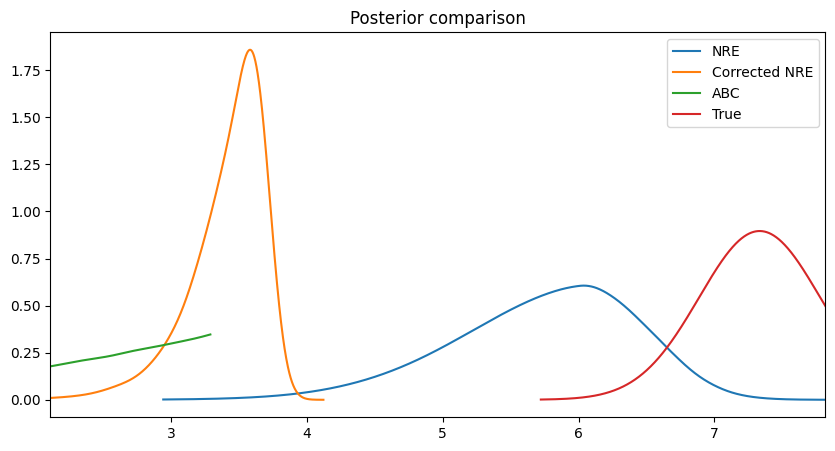

FIGURE CREATED at 
Finding grid...
New grid:  -3.8905918864131204 3.8905918864131204
Final grid:  -3.6414914 3.6414914
KDE...
Grid nre...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479587185275
New grid:  -3.2905267314918945 5.46885542773957
New grid:  -3.2905267314918945 6.344793643662716
New grid:  -3.2905267314918945 7.308325681178177
New grid:  -3.2905267314918945 8.368210922445185
New grid:  -3.2905267314918945 8.368210922445185
Final grid:  2.904126 7.833706
Grid corrected nre...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479587185275
New grid:  -3.2905267314918945 4.6725479587185275
Final grid:  1.9647838 4.136096
Grid kde...
Finding grid...
New grid:  -3.2905267314918945 3.2905267314919255
Final grid:  -3.2905267314918945 3.2905267314919255
True posterior...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725

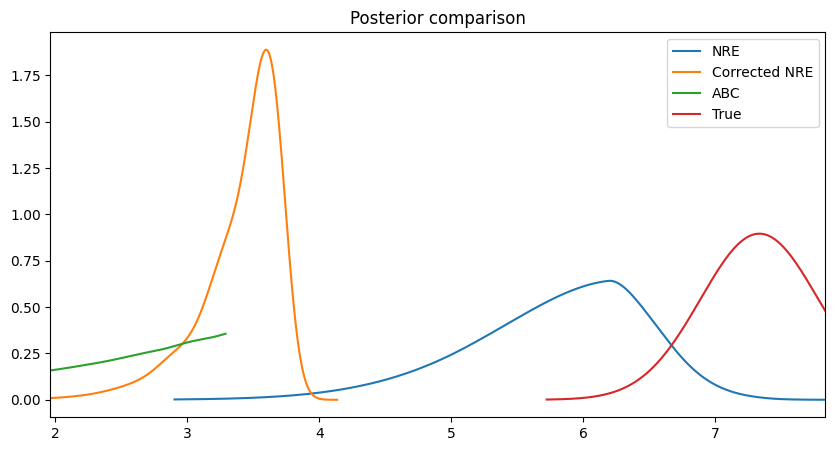

FIGURE CREATED at 
Finding grid...
New grid:  -3.8905918864131204 3.8905918864131204
Final grid:  -3.6414914 3.6414914
KDE...
Grid nre...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479587185275
New grid:  -3.2905267314918945 5.46885542773957
New grid:  -3.2905267314918945 6.344793643662716
New grid:  -3.2905267314918945 7.308325681178177
New grid:  -3.2905267314918945 8.368210922445185
New grid:  -3.2905267314918945 8.368210922445185
Final grid:  3.0815158 7.843042
Grid corrected nre...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479587185275
New grid:  -3.2905267314918945 4.6725479587185275
Final grid:  2.0349288 4.1297193
Grid kde...
Finding grid...
New grid:  -3.2905267314918945 3.2905267314919255
Final grid:  -3.2905267314918945 3.2905267314919255
True posterior...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.67

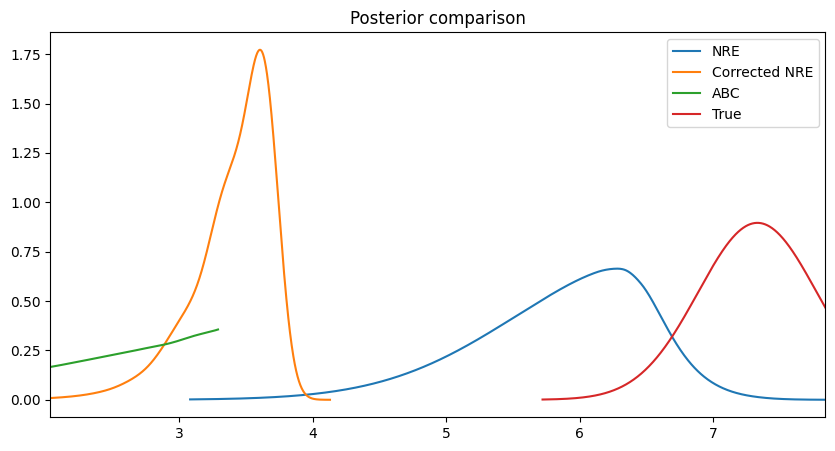

FIGURE CREATED at 
Finding grid...
New grid:  -3.8905918864131204 3.8905918864131204
Final grid:  -3.5695858 3.6349545
KDE...
Grid nre...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479587185275
New grid:  -3.2905267314918945 5.46885542773957
New grid:  -3.2905267314918945 6.344793643662716
New grid:  -3.2905267314918945 7.308325681178177
New grid:  -3.2905267314918945 8.368210922445185
New grid:  -3.2905267314918945 8.368210922445185
Final grid:  2.4559824 7.861715
Grid corrected nre...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 3.9486320777903074
Final grid:  1.8051456 4.1355896
Grid kde...
Finding grid...
New grid:  -3.2905267314918945 3.2905267314919255
Final grid:  -3.2905267314918945 3.2905267314919255
True posterior...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479587185275
New grid:  -3.2905267314918945 5.46

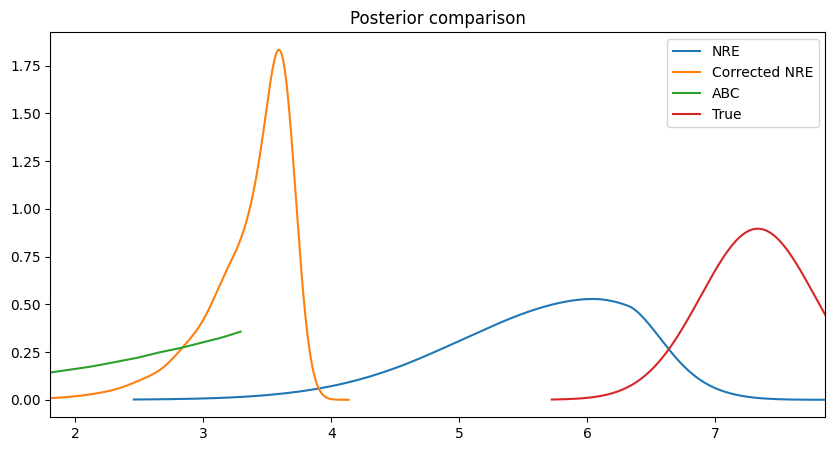

FIGURE CREATED at 
Finding grid...
New grid:  -3.8905918864131204 3.8905918864131204
Final grid:  -1.425889 3.5309098
KDE...
Grid nre...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479587185275
New grid:  -3.2905267314918945 5.46885542773957
New grid:  -3.2905267314918945 6.344793643662716
New grid:  -3.2905267314918945 7.308325681178177
New grid:  -3.2905267314918945 8.368210922445185
New grid:  -3.2905267314918945 8.368210922445185
Final grid:  2.364953 7.8827214
Grid corrected nre...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 3.9486320777903074
Final grid:  1.3319551 3.9493566
Grid kde...
Finding grid...
New grid:  -3.2905267314918945 3.2905267314919255
Final grid:  -3.2905267314918945 3.2905267314919255
True posterior...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479587185275
New grid:  -3.2905267314918945 5.468

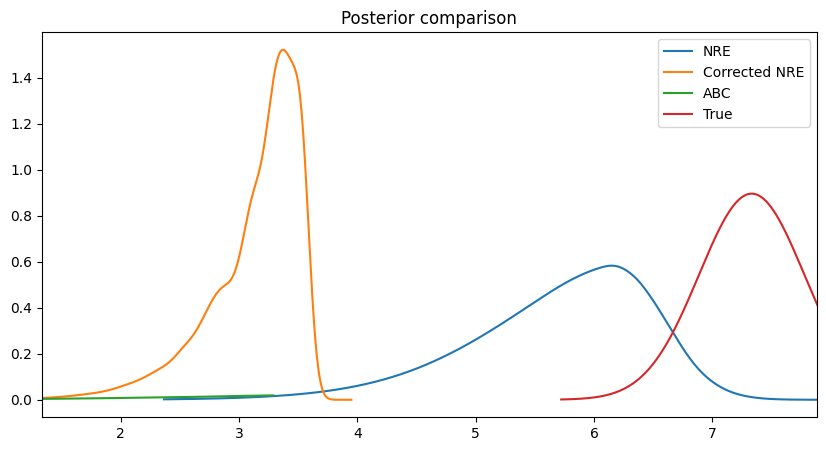

FIGURE CREATED at 
Finding grid...
New grid:  -3.8905918864131204 4.668710263695744
New grid:  -3.8905918864131204 5.5246404787066306
New grid:  -3.8905918864131204 6.466163715218606
New grid:  -3.8905918864131204 6.466163715218606
Final grid:  3.2454085 6.470825
KDE...
Grid nre...
Finding grid...
New grid:  -3.2905267314918945 3.2905267314919255
Final grid:  -3.2272851 3.760884
Grid corrected nre...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479587185275
New grid:  -3.2905267314918945 5.46885542773957
New grid:  -3.2905267314918945 6.344793643662716
New grid:  -3.2905267314918945 7.308325681178177
New grid:  -3.2905267314918945 7.308325681178177
Final grid:  3.847519 6.801193
Grid kde...
Finding grid...
New grid:  -3.2905267314918945 3.2905267314919255
Final grid:  -3.2905267314918945 3.2905267314919255
True posterior...
Finding grid...
New grid:  -3.2905267314918945 3.9486320777903074
New grid:  -3.2905267314918945 4.6725479

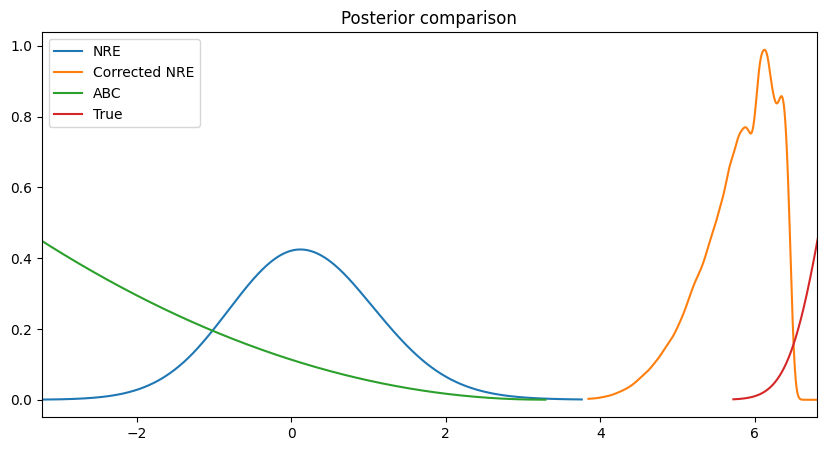

FIGURE CREATED at 
Finding grid...
New grid:  -3.8905918864131204 4.668710263695744
New grid:  -3.8905918864131204 5.5246404787066306
New grid:  -3.8905918864131204 6.466163715218606
New grid:  -3.8905918864131204 7.501839275381778
New grid:  -3.8905918864131204 7.501839275381778
Final grid:  3.981454 7.1506896
KDE...
Grid nre...
Finding grid...
New grid:  -3.9486320777902764 3.2905267314919255
New grid:  -4.672547958718496 3.2905267314919255
New grid:  -4.672547958718496 3.2905267314919255
Final grid:  -5.0161 2.0717535
Grid corrected nre...
Finding grid...
Expanding grid to  -3.9486320777902764 3.9486320777903074
New grid:  -3.9486320777902764 4.738358493348366
New grid:  -3.9486320777902764 5.60705755046223
New grid:  -3.9486320777902764 6.56262651328748
New grid:  -3.9486320777902764 7.613752372395256
New grid:  -3.9486320777902764 7.613752372395256
Final grid:  4.0790653 7.4679203
Grid kde...
Finding grid...
New grid:  -3.2905267314918945 3.2905267314919255
Final grid:  -3.2905267

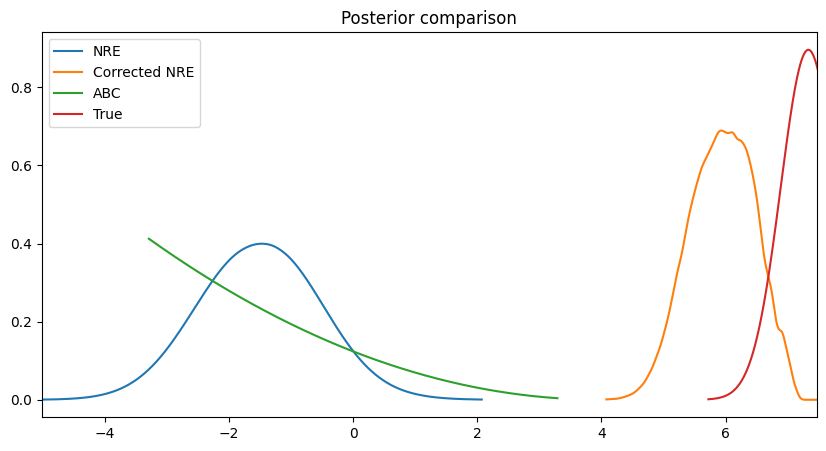

FIGURE CREATED at 
Finding grid...
New grid:  -3.8905918864131204 4.668710263695744
New grid:  -3.8905918864131204 5.5246404787066306
New grid:  -3.8905918864131204 6.466163715218606
New grid:  -3.8905918864131204 7.501839275381778
New grid:  -3.8905918864131204 7.501839275381778
Final grid:  4.5937448 7.620788
KDE...
Grid nre...
Finding grid...
New grid:  -3.9486320777902764 3.2905267314919255
New grid:  -4.672547958718496 3.2905267314919255
New grid:  -5.4688554277395385 3.2905267314919255
New grid:  -6.344793643662685 3.2905267314919255
New grid:  -6.344793643662685 3.2905267314919255
Final grid:  -6.464391 0.642019
Grid corrected nre...
Finding grid...
Expanding grid to  -3.9486320777902764 3.9486320777903074


In [ ]:
key = random.PRNGKey(0)
MU0 = 0.
SIGMA = 1.
N_SAMPLES = 3
N_KDE = 10000
N_SAMPLE = 10000
N_GRID = 10000
PATH_RESULTS = os.getcwd()+"/examples/Gauss-Gauss/Gauss_Gauss_1D_known_sigma/clean_results"
if not os.path.exists(PATH_RESULTS):
    os.makedirs(PATH_RESULTS)
    
    


for SIGMA0 in SIGMAS0:
    PRIOR_ARGS = {"MU0": MU0, "SIGMA": SIGMA}
    MODEL_ARGS = {"SIGMA": SIGMA}
    PATH_S0 = PATH_RESULTS + "/sigma0_" + str(SIGMA0)+"/"
    if not os.path.exists(PATH_S0):
        os.makedirs(PATH_S0)
    PATH_FIGURES = PATH_S0 + "figures/"
    if not os.path.exists(PATH_FIGURES):
        os.makedirs(PATH_FIGURES)
    PATH_PICKLES = PATH_S0 + "pickles/"
    if not os.path.exists(PATH_PICKLES):
        os.makedirs(PATH_PICKLES)
    PATH_CSV = PATH_S0 + "csv/"
    if not os.path.exists(PATH_CSV):
        os.makedirs(PATH_CSV)

    PRIOR = norm(loc=MU0, scale=SIGMA)
    PRIOR_LOGPDF = lambda x: PRIOR.logpdf(x) 
    MIN_INIT, MAX_INIT = PRIOR.interval(0.9999)  
    
    ALPHAS = np.array(data[SIGMA0][1]["ALPHAS"])
      
    TRAIN_ACCURACY_i = {alpha: 0 for alpha in ALPHAS}
    TEST_LOSSES_i = {alpha: 0 for alpha in ALPHAS}
    TRAIN_LOSSES_i = {alpha: 0 for alpha in ALPHAS}
    TIME_SIMULATIONS_i = {alpha: 0 for alpha in ALPHAS}
    TIME_TRAINING_i = {alpha: 0 for alpha in ALPHAS}
    TIME_EVAL_i = {}
    PARAMS_i = {}
    time_iterations = {}
    for i_dataset in range(1, 11):
        ALPHAS = np.array(data[SIGMA0][i]["ALPHAS"])
        PARAMS = data[SIGMA0][i]["PARAMS"]
        TRUE_DATA = data[SIGMA0][i]["TRUE_DATA"]
        N_DATA = len(TRUE_DATA)
        EPSILONS = data[SIGMA0][i]["EPSILONS"]
        TEST_ACCURACY_i = data[SIGMA0][i]["TEST_ACCURACY"]
        TRUE_THETA = data[SIGMA0][i]["TRUE_MU"]
        
        METRICS_ABC_i = {}
        METRICS_NRE_i = {}
        METRICS_CORRECTED_NRE_i = {}
        TIME_EVAL_i = {}
        for a in ALPHAS:
            params = PARAMS[a]
            key, key_abc, key_evaluate = random.split(key, 3)
            THETAS_ABC = true_pseudo_posterior_sample(key_abc, TRUE_DATA, EPSILONS[a], 100000, PRIOR)
            plot_posterior_comparison(params, TRUE_DATA, THETAS_ABC, PRIOR, "", N_GRID = 1000, show = True, true_posterior_pdf=true_posterior_pdf)
            # KDE_APPROX = gaussian_kde(THETAS_ABC)
            # grid_nre, pdf_nre = find_grid_explorative(lambda x: NRE_posterior_pdf(params, x, TRUE_DATA, PRIOR_LOGPDF), N_GRID, N_GRID, MIN_INIT, MAX_INIT)
            # grid_nre_corrected, pdf_nre_corrected = find_grid_explorative(lambda x: NRE_corrected_posterior_pdf(params, x, TRUE_DATA, KDE_APPROX), N_GRID, N_GRID, MIN_INIT, MAX_INIT)
            # grid_true, pdf_true = find_grid_explorative(lambda x: true_posterior_pdf(x, TRUE_DATA), N_GRID, N_GRID, MIN_INIT, MAX_INIT)
            # grid_abc, pdf_abc = find_grid_explorative(lambda x: true_pseudo_post(x, np.mean(TRUE_DATA), EPSILONS[a], PRIOR), N_GRID, N_GRID, MIN_INIT, MAX_INIT)
                                    
            # plt.plot(grid_nre, pdf_nre/np.trapz(pdf_nre, grid_nre), label="NRE")
            # plt.axvline(x=TRUE_DATA.mean(), color="black", linestyle="--", label="True theta")
            # # plt.plot(grid_nre_corrected, pdf_nre_corrected/np.trapz(pdf_nre_corrected, grid_nre_corrected), label="NRE corrected")
            # # plt.plot(grid_true, pdf_true/np.trapz(pdf_true, grid_true), label="True")
            # # plt.plot(grid_abc, pdf_abc/np.trapz(pdf_abc, grid_abc), label="ABC")
            # plt.legend()
            # plt.show()
                            
        #     METRICS_ABC_ij, METRICS_NRE_ij, METRICS_CORRECTED_NRE_ij, time_eval = evaluate_metrics(key_evaluate, TRUE_DATA, params, THETAS_ABC, PRIOR, N_GRID, N_SAMPLE, N_SAMPLES, true_posterior_sample, N_KDE)
        #     PARAMS_i[a] = params

        #     TIME_EVAL_i[a] = time_eval
        #     METRICS_ABC_i[a] = METRICS_ABC_ij
        #     METRICS_NRE_i[a] = METRICS_NRE_ij
        #     METRICS_CORRECTED_NRE_i[a] = METRICS_CORRECTED_NRE_ij
        
        # plot_metric_for_a_dataset("C2ST", ALPHAS, METRICS_ABC_i, METRICS_NRE_i, METRICS_CORRECTED_NRE_i, N_SAMPLES, PATH_FIGURES + "c2st_{}.png".format(i_dataset), show = False)
        # plot_metric_for_a_dataset("RS_stat", ALPHAS, METRICS_ABC_i, METRICS_NRE_i, METRICS_CORRECTED_NRE_i, N_SAMPLES, PATH_FIGURES + "ranksums_{}.png".format(i_dataset), show = False)
        # create_csv_for_a_dataset(i_dataset, ALPHAS, TEST_ACCURACY_i, TRAIN_ACCURACY_i, TEST_LOSSES_i, TRAIN_LOSSES_i, TIME_SIMULATIONS_i, TIME_TRAINING_i, TIME_EVAL_i, METRICS_ABC_i, METRICS_NRE_i, METRICS_CORRECTED_NRE_i, TRUE_DATA, TRUE_THETA, PATH_CSV + "dataset_{}.csv".format(i_dataset))
        # create_pickle_for_a_dataset(ALPHAS, PARAMS_i, METRICS_ABC_i, METRICS_NRE_i, METRICS_CORRECTED_NRE_i, TRUE_DATA, TRUE_THETA, TIME_SIMULATIONS_i, TIME_TRAINING_i, TIME_EVAL_i, MODEL_ARGS, PRIOR_ARGS, PATH_PICKLES + "dataset_{}.pkl".format(i_dataset))

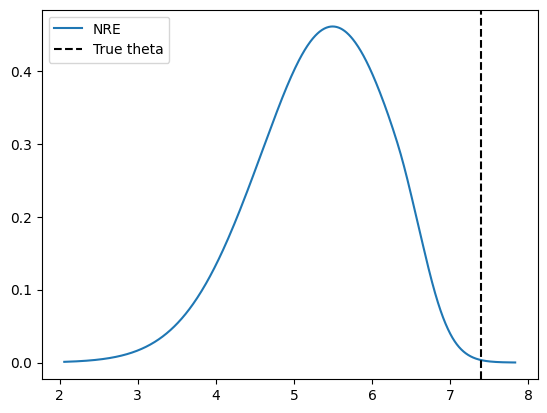

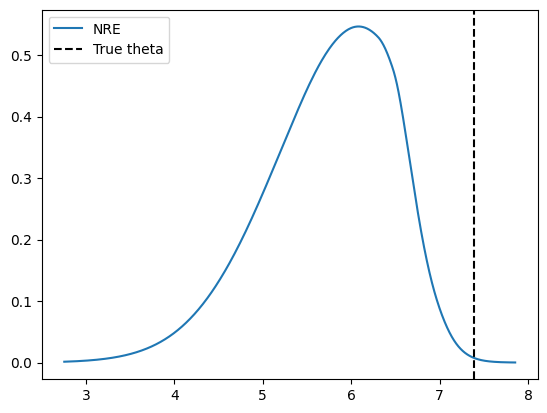

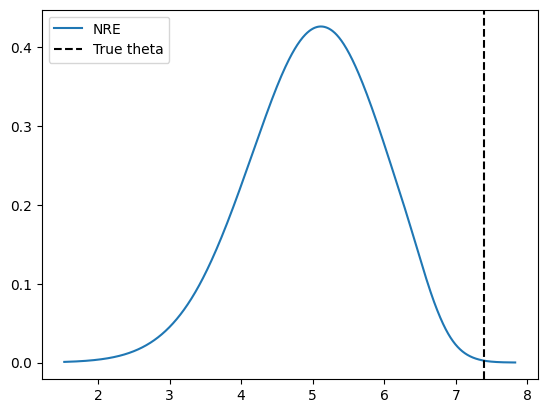

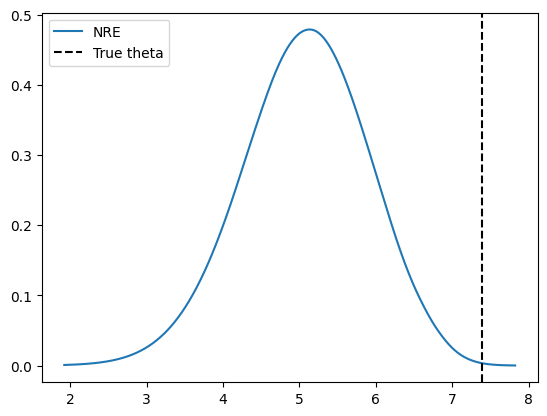

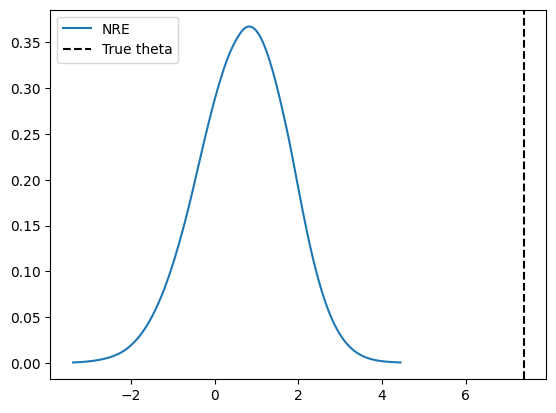

/Users/antoineluciano/.pyenv/versions/3.10.13/envs/jax_env/lib/python3.10/site-packages/jax/_src/numpy/array_methods.py:272: RuntimeWarning: overflow encountered in cast
  return binary_op(*args)


KeyboardInterrupt: 

In [21]:
for alpha in ALPHAS:
    params = data[SIGMA0][2]["PARAMS"][alpha]
    grid_nre, pdf_nre = find_grid_explorative(lambda x: NRE_posterior_pdf(params, x, TRUE_DATA, PRIOR_LOGPDF), N_GRID, N_GRID, MIN_INIT, MAX_INIT)
    plt.plot(grid_nre, pdf_nre/np.trapz(pdf_nre, grid_nre), label="NRE")
    plt.axvline(x=TRUE_DATA.mean(), color="black", linestyle="--", label="True theta")
    plt.legend()
    plt.show()
    